<a href="https://colab.research.google.com/github/anushapalisetty/Intel-Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import set_random_seed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/"

In [ ]:
def loadImages(path,classes):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, classes, file)
                          for file in os.listdir(path + classes)
                          if file.endswith('.jpg')])
    return image_files

In [ ]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
classes1=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
for i in range(len(classes)):
  classes1[i]=loadImages(path,classes[i])
  print(f'length of {classes[i]} is {len(classes1[i])}')

length of buildings is 2200
length of forest is 2281
length of glacier is 2404
length of mountain is 2522
length of sea is 2284
length of street is 2382


In [ ]:
%time
build_img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in classes1[4][:20]]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


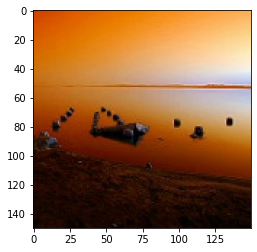

In [ ]:
plt.imshow(build_img[3])

In [ ]:
## Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=True,shear_range=0.2,
    zoom_range=0.2, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
train_data_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=32,
      class_mode='binary',
      seed=2000,
      subset='training'
    
)

validation_data_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=32,
      class_mode='binary',
      seed=2000,
      subset='validation'
    
)

test_data_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=32,
      class_mode='binary',
      seed=2000
)

Found 12667 images belonging to 6 classes.
Found 1406 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
